###setup amalearn lib

In [1]:
! rm -r -f amalearn

In [2]:
! unzip amalearn-0.1.zip

Archive:  amalearn-0.1.zip
   creating: amalearn/
   creating: amalearn/.git/
  inflating: amalearn/.git/description  
   creating: amalearn/.git/hooks/
  inflating: amalearn/.git/hooks/applypatch-msg.sample  
  inflating: amalearn/.git/hooks/commit-msg.sample  
  inflating: amalearn/.git/hooks/fsmonitor-watchman.sample  
  inflating: amalearn/.git/hooks/post-update.sample  
  inflating: amalearn/.git/hooks/pre-applypatch.sample  
  inflating: amalearn/.git/hooks/pre-commit.sample  
  inflating: amalearn/.git/hooks/pre-merge-commit.sample  
  inflating: amalearn/.git/hooks/pre-push.sample  
  inflating: amalearn/.git/hooks/pre-rebase.sample  
  inflating: amalearn/.git/hooks/pre-receive.sample  
  inflating: amalearn/.git/hooks/prepare-commit-msg.sample  
  inflating: amalearn/.git/hooks/update.sample  
   creating: amalearn/.git/info/
  inflating: amalearn/.git/info/exclude  
   creating: amalearn/.git/refs/
   creating: amalearn/.git/refs/heads/
  inflating: amalearn/.git/refs/heads/

In [3]:
! pip install -e ./amalearn

Obtaining file:///content/amalearn
  Found existing installation: amalearn 0.1
    Can't uninstall 'amalearn'. No files were found to uninstall.
  Running setup.py develop for amalearn


###action reward

In [4]:
from amalearn.reward import RewardBase
import numpy as np

class BusReward(RewardBase):
    def __init__(self, mean, std, i):
        super(BusReward, self).__init__()
        self.mean = mean
        self.std = std
        self.i = i

    def get_reward(self):
        s = np.random.normal(loc=self.mean, scale=self.std)
        r = 0
        if self.i<s:
          r = (-5000)
        else:
          r = 0
        return r


###EpsilonGreedyAgent

In [5]:
import operator
from amalearn.agent import AgentBase

class EpsilonGreedyAgent(AgentBase):
    def __init__(self, id, environment, lr=None, eps=None):
        super(EpsilonGreedyAgent, self).__init__(id, environment)
        self.act_num = self.environment.available_actions()
        self.m0 = 0      # mean
        self.actions_estimation = dict(zip(range(self.act_num), [self.m0 for i in range(self.act_num)]))
        self.length = 0
        self.trial = {}
        self.lr = lr
        self.eps = eps
        print(self.actions_estimation)
    
    def reset(self):
        self.actions_estimation = dict(zip(range(self.act_num), [self.m0 for i in range(self.act_num)]))
        self.length = 0
        self.trial = {}
        print(self.actions_estimation)

    def u(self, r):
        return -800*((np.absolute(r))**(0.3))

    def update_estimation(self, action, r):
        u = self.u(r)
        if self.lr is None:
          self.actions_estimation[action] = \
            ((self.actions_estimation[action]*self.length)+u)/float(self.length+1)
        else:
          self.actions_estimation[action] = ((1-self.lr)*self.actions_estimation[action])+(u*self.lr)

        self.trial[self.length] = (action, u)
        self.length += 1

    def select_action(self):
        p = np.random.random()
        eps = self.eps
        if self.eps is None:
          eps = (1/float(self.length+1))-((1/float(self.length+1))/float(self.act_num))
        best_q_index = max(self.actions_estimation.items(), key=operator.itemgetter(1))[0]
        candid = [i for i in range(self.act_num) if i != best_q_index]
        if p < eps: 
          j = np.random.choice(len(candid))
          best_q_index = candid[j]
        return best_q_index

    def get_stat(self):
        return self.trial

    def get_best_action(self):
        best_q_index = max(self.actions_estimation.items(), key=operator.itemgetter(1))[0]
        return (best_q_index, self.actions_estimation[best_q_index])

    def take_action(self) -> (object, float, bool, object):
        action = self.select_action()
        obs, r, d, i = self.environment.step(action)
        self.update_estimation(action, r)
        print(obs, r, self.u(r), d, i)
        self.environment.render()
        return obs, r, self.u(r), d, i


###simulate EpsilonGreedyAgent and env

In [6]:
from amalearn.environment import MutliArmedBanditEnvironment
from amalearn.reward import GaussianReward

means = [8 for i in range(15)]
stds = [3 for i in range(15)]

rewards = [BusReward(means[i], stds[i], i+1) for i in range(15)]
env = MutliArmedBanditEnvironment(rewards, 3000, '1')
agent = EpsilonGreedyAgent('1', env)

data = []
qsum = 0
astar = 0

for run in range(30):
  print('run: ',run)
  for step in range(3000):
      agent.take_action()
  data.append(agent.get_stat())
  qsum += agent.get_best_action()[1]
  astar = agent.get_best_action()[0]
  env.reset()
  agent.reset()

Streaming output truncated to the last 5000 lines.
501:	action=13
{} 0 -0.0 False {}
502:	action=13
{} 0 -0.0 False {}
503:	action=13
{} 0 -0.0 False {}
504:	action=13
{} 0 -0.0 False {}
505:	action=13
{} -5000 -10298.666348361789 False {}
506:	action=13
{} 0 -0.0 False {}
507:	action=13
{} 0 -0.0 False {}
508:	action=13
{} 0 -0.0 False {}
509:	action=13
{} 0 -0.0 False {}
510:	action=13
{} 0 -0.0 False {}
511:	action=13
{} 0 -0.0 False {}
512:	action=13
{} 0 -0.0 False {}
513:	action=13
{} 0 -0.0 False {}
514:	action=13
{} 0 -0.0 False {}
515:	action=13
{} 0 -0.0 False {}
516:	action=13
{} 0 -0.0 False {}
517:	action=13
{} 0 -0.0 False {}
518:	action=13
{} 0 -0.0 False {}
519:	action=13
{} -5000 -10298.666348361789 False {}
520:	action=13
{} 0 -0.0 False {}
521:	action=14
{} 0 -0.0 False {}
522:	action=14
{} 0 -0.0 False {}
523:	action=14
{} 0 -0.0 False {}
524:	action=14
{} 0 -0.0 False {}
525:	action=14
{} 0 -0.0 False {}
526:	action=14
{} 0 -0.0 False {}
527:	action=14
{} 0 -0.0 Fa

### draw regret

In [7]:
def draw_list(data, xlabel, ylabel, data_label):
  plt.plot(range(len(data)), data, label=data_label)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.grid()
  plt.legend()

def draw_lists_compare(data1, data2, xlabel, ylabel, data1_label, data2_label):
  plt.plot(range(len(data1)), data1, label=data1_label)
  plt.plot(range(len(data2)), data2, label=data2_label)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.grid()
  plt.legend()

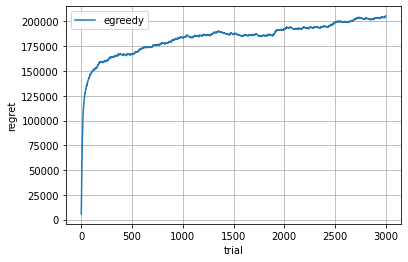

In [8]:
import matplotlib.pyplot as plt

def regret_per_run(data, best_action_mean, h):
    sum = 0
    for i in data.keys():
      if i > (h-1):
        break
      sum += data[i][1]
    return h*best_action_mean-sum

def regret(data, max_mean):
  regret_list = []
  for run in data:
    run_regret = []
    for j in range(len(run.keys())):
      run_regret.append(regret_per_run(run, max_mean, j+1))
    regret_list.append(run_regret)

  return regret_list

mean_regret = np.mean(np.array(regret(data, qsum/30)), axis=0)
draw_list(mean_regret, 'trial', 'regret', 'egreedy')

###draw optimal action %

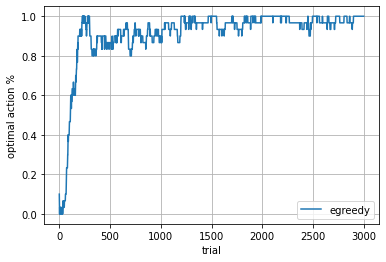

In [9]:
def optimal_action_ratio(data, opta):
  res = []
  trial_num = len(data[0].keys())

  for j in range(trial_num):
    temp = []
    for i in data:
      temp.append(i[j][0])
    res.append((temp.count(opta))/len(temp))
  
  return res

opta = astar
opta_per = optimal_action_ratio(data, opta)
draw_list(opta_per, 'trial', 'optimal action %', 'egreedy')

In [10]:
print('optimal time of waiting: ', astar+1)

optimal time of waiting:  15


###UCB agent

In [11]:
import operator
from amalearn.agent import AgentBase

class UCBAgent(AgentBase):
    def __init__(self, id, c, environment):
        super(UCBAgent, self).__init__(id, environment)
        self.act_num = self.environment.available_actions()
        self.m0 = 0      # mean
        self.actions_estimation = dict(zip(range(self.act_num), [self.m0 for i in range(self.act_num)]))
        self.act_count = dict(zip(range(self.act_num), [0 for i in range(self.act_num)]))
        self.length = 0
        self.trial = {}
        self.c = c
        print(self.actions_estimation)
    
    def reset(self):
        self.actions_estimation = dict(zip(range(self.act_num), [self.m0 for i in range(self.act_num)]))
        self.act_count = dict(zip(range(self.act_num), [0 for i in range(self.act_num)]))
        self.length = 0
        self.trial = {}
        print(self.actions_estimation)

    def u(self, r):
        return -800*((np.absolute(r))**(0.3))

    def update_estimation(self, action, r):
        u = self.u(r)
        self.actions_estimation[action] = ((self.actions_estimation[action]*self.length)+u)/float(self.length+1)

        self.trial[self.length] = (action, u)
        self.act_count[action] += 1
        self.length += 1

    def select_action(self):
        cond = {}
        for i in range(self.act_num):
          if self.act_count[i] == 0:
            cond[i] = float('inf')
            continue
          cond[i] = self.actions_estimation[i] + self.c * (np.sqrt((np.log(self.length))/self.act_count[i]))
        return max(cond.items(), key=operator.itemgetter(1))[0]

    def get_stat(self):
        return self.trial

    def get_best_action(self):
        best_q_index = max(self.actions_estimation.items(), key=operator.itemgetter(1))[0]
        return (best_q_index, self.actions_estimation[best_q_index])

    def take_action(self) -> (object, float, bool, object):
        action = self.select_action()
        obs, r, d, i = self.environment.step(action)
        self.update_estimation(action, r)
        print(obs, r, self.u(r), d, i)
        self.environment.render()
        return obs, r, self.u(r), d, i


In [12]:
from amalearn.environment import MutliArmedBanditEnvironment
from amalearn.reward import GaussianReward

means = [8 for i in range(15)]
stds = [3 for i in range(15)]

rewards = [BusReward(means[i], stds[i], i+1) for i in range(15)]
env = MutliArmedBanditEnvironment(rewards, 3000, '1')
agent = UCBAgent('1', 2, env)

dataUCB = []
qsumUCB = 0
astarUCB = 0

for run in range(30):
  print('run: ',run)
  for step in range(3000):
      agent.take_action()
  dataUCB.append(agent.get_stat())
  qsumUCB += agent.get_best_action()[1]
  astarUCB = agent.get_best_action()[0]
  env.reset()
  agent.reset()

Streaming output truncated to the last 5000 lines.
501:	action=14
{} 0 -0.0 False {}
502:	action=14
{} 0 -0.0 False {}
503:	action=14
{} 0 -0.0 False {}
504:	action=14
{} 0 -0.0 False {}
505:	action=14
{} 0 -0.0 False {}
506:	action=14
{} 0 -0.0 False {}
507:	action=14
{} 0 -0.0 False {}
508:	action=14
{} 0 -0.0 False {}
509:	action=14
{} 0 -0.0 False {}
510:	action=14
{} 0 -0.0 False {}
511:	action=14
{} 0 -0.0 False {}
512:	action=14
{} 0 -0.0 False {}
513:	action=14
{} 0 -0.0 False {}
514:	action=14
{} 0 -0.0 False {}
515:	action=14
{} 0 -0.0 False {}
516:	action=14
{} 0 -0.0 False {}
517:	action=14
{} 0 -0.0 False {}
518:	action=14
{} 0 -0.0 False {}
519:	action=14
{} 0 -0.0 False {}
520:	action=14
{} 0 -0.0 False {}
521:	action=14
{} 0 -0.0 False {}
522:	action=14
{} 0 -0.0 False {}
523:	action=14
{} 0 -0.0 False {}
524:	action=14
{} 0 -0.0 False {}
525:	action=14
{} 0 -0.0 False {}
526:	action=14
{} 0 -0.0 False {}
527:	action=14
{} 0 -0.0 False {}
528:	action=14
{} 0 -0.0 False 

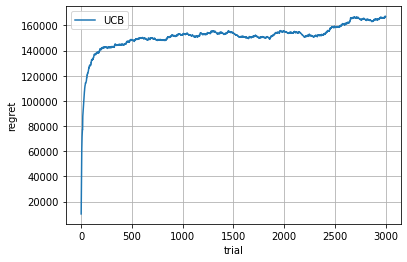

In [13]:
mean_regretUCB = np.mean(np.array(regret(dataUCB, qsumUCB/30)), axis=0)
draw_list(mean_regretUCB, 'trial', 'regret', 'UCB')

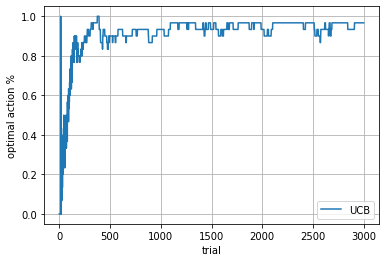

In [14]:
opta = astarUCB
opta_perUCB = optimal_action_ratio(dataUCB, opta)
draw_list(opta_perUCB, 'trial', 'optimal action %', 'UCB')

In [15]:
print('optimal time of waiting: ', astarUCB+1)

optimal time of waiting:  15


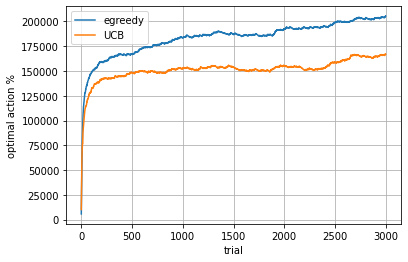

In [16]:
draw_lists_compare(mean_regret, mean_regretUCB, 'trial', 'optimal action %','egreedy','UCB')

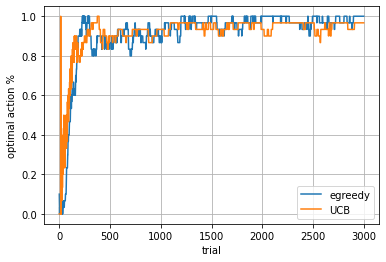

In [17]:
draw_lists_compare(opta_per, opta_perUCB, 'trial', 'optimal action %','egreedy','UCB')

In [33]:
from amalearn.environment import MutliArmedBanditEnvironment
from amalearn.reward import GaussianReward

means = [8 for i in range(15)]
stds = [3 for i in range(15)]

lrs = [0.002, 0.02, 0.2, 0.6]
select_opt = []
regret = []

rewards = [BusReward(means[i], stds[i], i+1) for i in range(15)]
env = MutliArmedBanditEnvironment(rewards, 3000, '1')

for lr in lrs:
  agent = EpsilonGreedyAgent('1', env, lr)
  data = 0
  for run in range(100):
     #train
    for step in range(2000):
        agent.take_action()
    #test
    qsum = 0
    for step in range(500):
        _, _, u, _, _ = agent.take_action()
        qsum += u
    data += -1*qsum
    env.reset()
    agent.reset()
  regret.append(data/30)

Streaming output truncated to the last 5000 lines.
1:	action=8
{} -5000 -10298.666348361789 False {}
2:	action=0
{} -5000 -10298.666348361789 False {}
3:	action=1
{} -5000 -10298.666348361789 False {}
4:	action=2
{} -5000 -10298.666348361789 False {}
5:	action=3
{} -5000 -10298.666348361789 False {}
6:	action=4
{} 0 -0.0 False {}
7:	action=5
{} -5000 -10298.666348361789 False {}
8:	action=5
{} 0 -0.0 False {}
9:	action=6
{} 0 -0.0 False {}
10:	action=10
{} -5000 -10298.666348361789 False {}
11:	action=6
{} 0 -0.0 False {}
12:	action=7
{} 0 -0.0 False {}
13:	action=7
{} -5000 -10298.666348361789 False {}
14:	action=7
{} 0 -0.0 False {}
15:	action=8
{} -5000 -10298.666348361789 False {}
16:	action=8
{} 0 -0.0 False {}
17:	action=9
{} -5000 -10298.666348361789 False {}
18:	action=9
{} 0 -0.0 False {}
19:	action=10
{} 0 -0.0 False {}
20:	action=10
{} -5000 -10298.666348361789 False {}
21:	action=10
{} 0 -0.0 False {}
22:	action=11
{} 0 -0.0 False {}
23:	action=11
{} 0 -0.0 False {}
24:	act

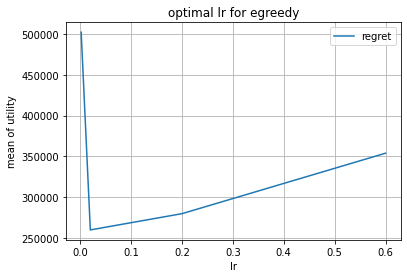

In [34]:
plt.plot(lrs, regret, label='regret')
plt.ylabel('mean of utility')
plt.xlabel('lr')
plt.title('optimal lr for egreedy')
plt.grid()
plt.legend()